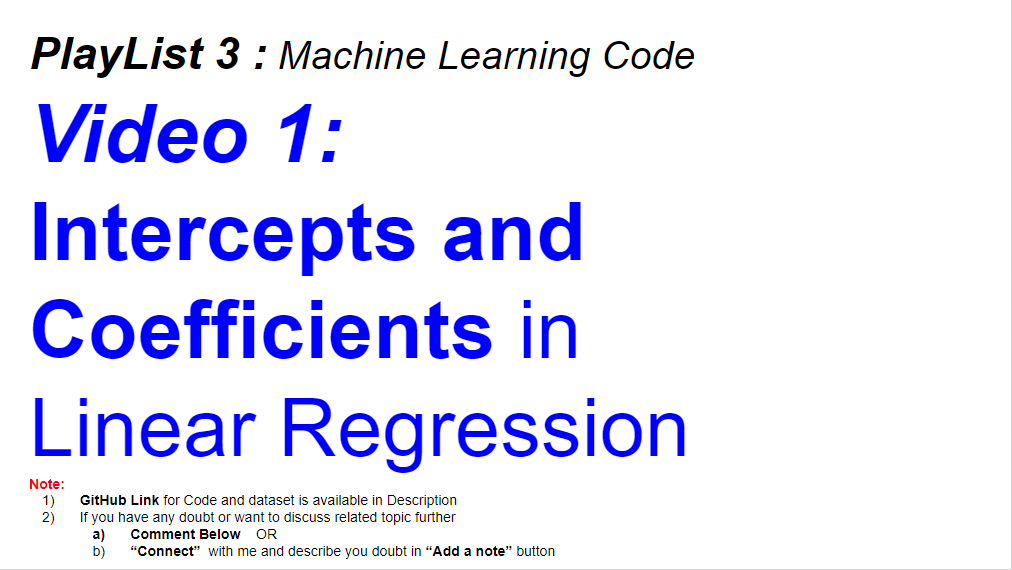

In [1]:
# Importing Lbraries
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
#  to sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is displayed inline within frontends
# like the Jupyter notebook, directly below the code cell that produced it.

In [2]:
data = pd.read_csv('Advertising.csv')
data
# I/p parameters or "InDependent" features : advertising in "TV" , "Radio" , "Newspaper"
# O/p parameter or "Dependent" feature : "Sales"

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.shape # # to print the SHAPE of the dataframe

(200, 5)

In [4]:
data.info() # to print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isnull().sum() # counting the number of Null values in each feature of the dataset

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

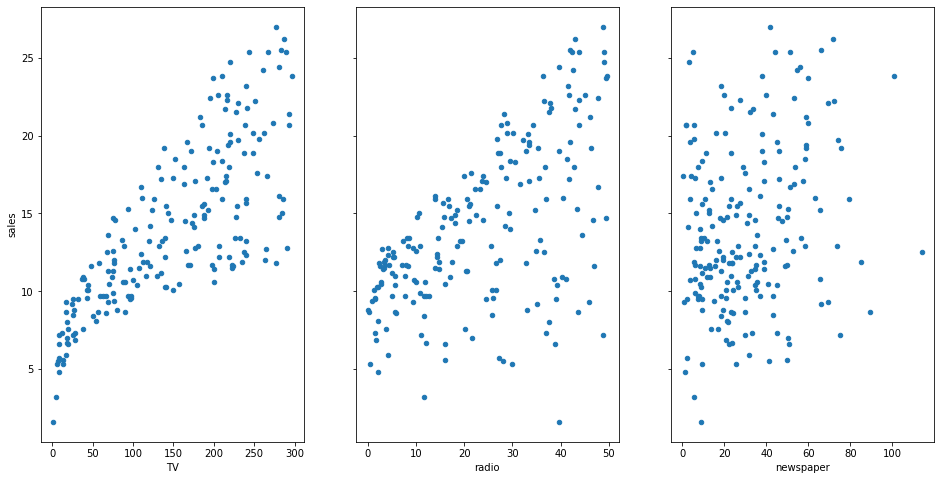

In [6]:
# To visualize the relationship between the features {i/p} and the response {o/p} using ScatterPlots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind = 'scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind = 'scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind = 'scatter', x='newspaper', y='sales', ax=axs[2])

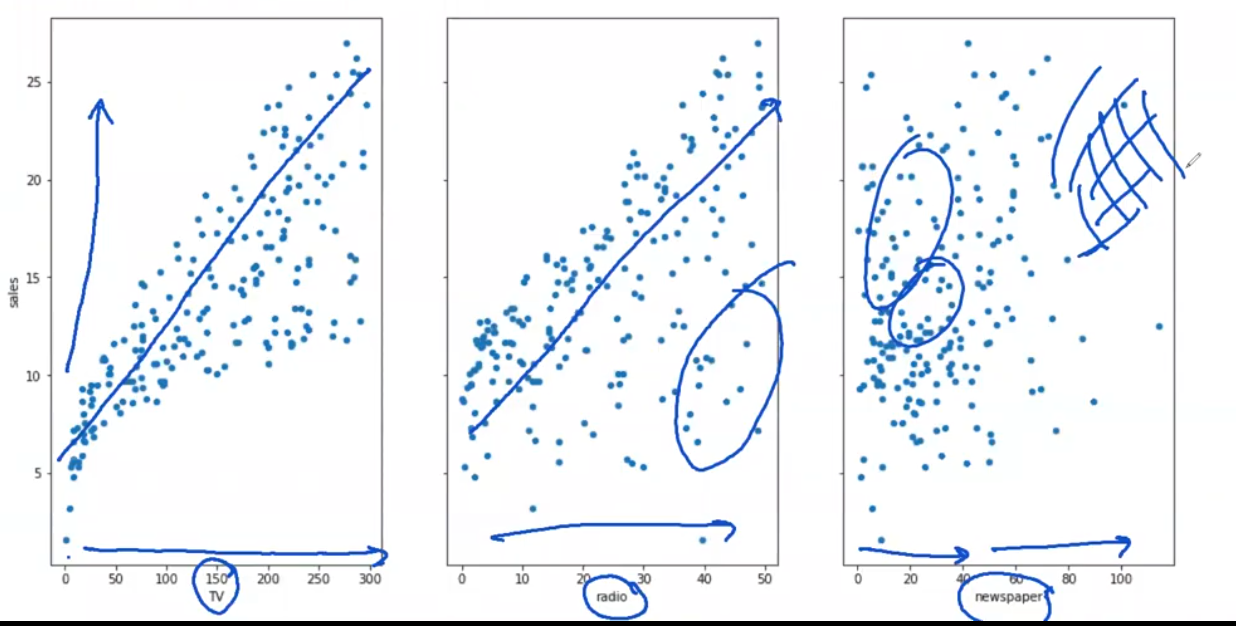

In [7]:
# Observation:
    # 1) Sales is Increasing with more "TV" advertisement
    # 2) Though, Sales is Increasing with more "Radio" advertisement
            # But Sales is not increasing propostionately further. 
            # Increasing Disbustion of Sales data
    # 3) Sales is Increasing with more "Newspaper" advertisement upto 40
            # but for [40+ units of "Newspaper" advertisement], Sales is not increasing
    # 4) 25+ units of Sales is acheived through
            # 300 units of "TV" advertisement ,
            # 50 units of "Radio" advertisement ,
            # 50 units of "Newspaper" advertisement ,

In [8]:
# to Create 
    # In-Dependent Variables (Xi) and 
    # Dependent Variables (y)
    
feature_cols = ['TV', 'radio','newspaper']
X = data[feature_cols]
y = data['sales']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

# to print Intercept and CO-efficientS
print(lm.intercept_)
print(lm.coef_) #o/p =~ [TV coefficient, Radio coefficient,Newspaper coefficient]

# y = m1 * x1 + m2 * x3 + m3 * x3 + c
# Sales = (0.045) * TV + (0.188) * Radio + (-0.001) * Newspaper + (2.938)
# Radio_Advertising has maximum and 'Newspaper_Advertising' has minimum/negative
        # impact on Sales

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [9]:
# Statistical Models
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=data).fit()
# Ordinary Least Squares regression (OLS)
lm.conf_int() #Co-efficient (m) variables

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        18:11:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

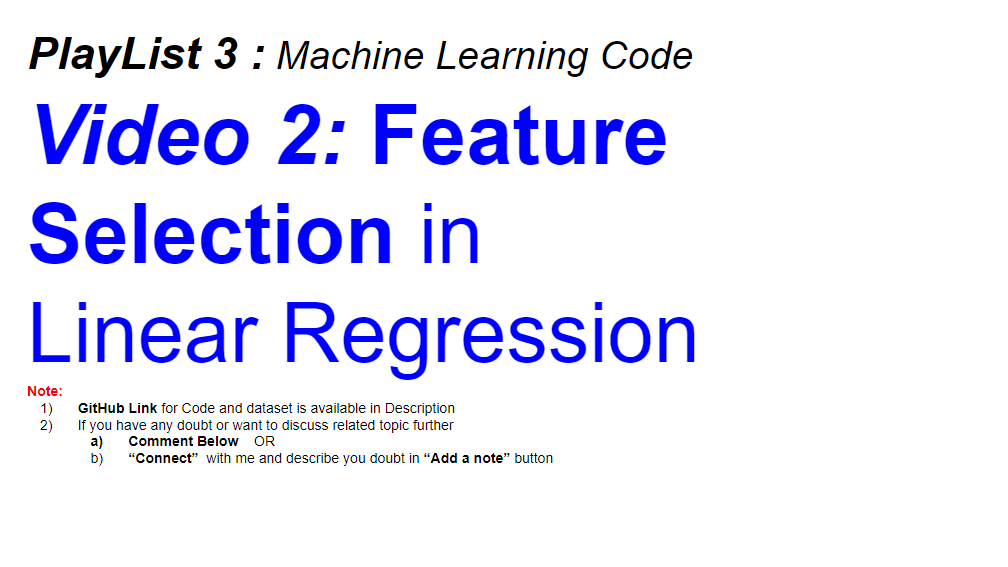

# Feature Selection

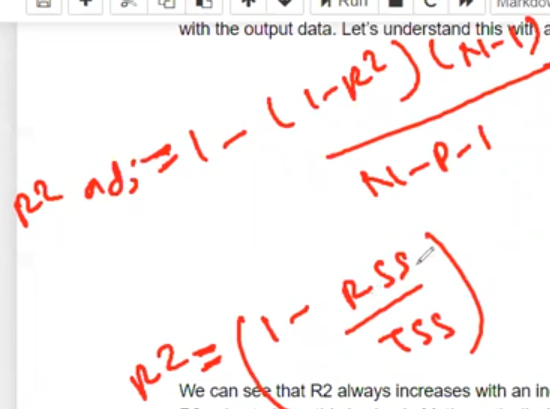

In [11]:
lm_TvRdNp = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=data).fit()
print("lm_TvRdNp.rsquared =   ",lm_TvRdNp.rsquared)
print("lm_TvRdNp.rsquared_adj =   ",lm_TvRdNp.rsquared_adj)

lm_TvRd = smf.ols(formula = 'sales ~ TV + radio', data=data).fit()
print("\nlm_TvRd.rsquared =   ",lm_TvRd.rsquared) # '\n' breaks the line, acts as 'ENTER' button
print("lm_TvRd.rsquared_adj =   ",lm_TvRd.rsquared_adj)

lm_TvNp = smf.ols(formula = 'sales ~ TV + newspaper', data=data).fit()
print("\nlm_TvNp.rsquared =   ",lm_TvNp.rsquared)
print("lm_TvNp.rsquared_adj =   ",lm_TvNp.rsquared_adj)

lm_RdNp = smf.ols(formula = 'sales ~ radio + newspaper', data=data).fit()
print("\nlm_RdNp.rsquared =   ",lm_RdNp.rsquared)
print("lm_RdNp.rsquared_adj =   ",lm_RdNp.rsquared_adj)

lm_Tv = smf.ols(formula = 'sales ~ TV', data=data).fit()
print("\nlm_Tv.rsquared =   ",lm_Tv.rsquared)
print("lm_Tv.rsquared_adj =   ",lm_Tv.rsquared_adj)

lm_Rd = smf.ols(formula = 'sales ~ radio', data=data).fit()
print("\nlm_Rd.rsquared =   ",lm_Rd.rsquared)
print("lm_Rd.rsquared_adj =   ",lm_Rd.rsquared_adj)

lm_Np = smf.ols(formula = 'sales ~ newspaper', data=data).fit()
print("\nlm_Np.rsquared =   ",lm_Np.rsquared)
print("lm_Np.rsquared_adj =   ",lm_Np.rsquared_adj)

# similar results as above (~ 0.89) shows the negigible / negative impact of 'Newspaper'

# R-squared is not a Correct approach, 
        # as its values increases whenever a new feature, even if irrelevent , is added
# Adjusted R-Square penalizes the model complexity to control over-fitting
        # but it under-penalizes complexity
# So better solution is "Cross- Validation"

lm_TvRdNp.rsquared =    0.8972106381789522
lm_TvRdNp.rsquared_adj =    0.8956373316204668

lm_TvRd.rsquared =    0.8971942610828957
lm_TvRd.rsquared_adj =    0.8961505479974429

lm_TvNp.rsquared =    0.6458354938293271
lm_TvNp.rsquared_adj =    0.6422399150864777

lm_RdNp.rsquared =    0.33270518395032256
lm_RdNp.rsquared_adj =    0.3259306172899197

lm_Tv.rsquared =    0.611875050850071
lm_Tv.rsquared_adj =    0.6099148238341623

lm_Rd.rsquared =    0.33203245544529525
lm_Rd.rsquared_adj =    0.32865888198794835

lm_Np.rsquared =    0.05212044544430516
lm_Np.rsquared_adj =    0.04733317496675127


In [12]:
# N = Number of Sample Size
# P = Number of predictors

# Cross - Validation
        # it provides a more reliable way to choose which of the created models will best generalize
                # as it better estimates of out-of-sample error

In [13]:
max(lm_TvRdNp.rsquared_adj,
   lm_TvRd.rsquared_adj,
    lm_TvNp.rsquared_adj,
    lm_RdNp.rsquared_adj,
    lm_Tv.rsquared_adj,
    lm_Rd.rsquared_adj,
    lm_Np.rsquared_adj)

0.8961505479974429

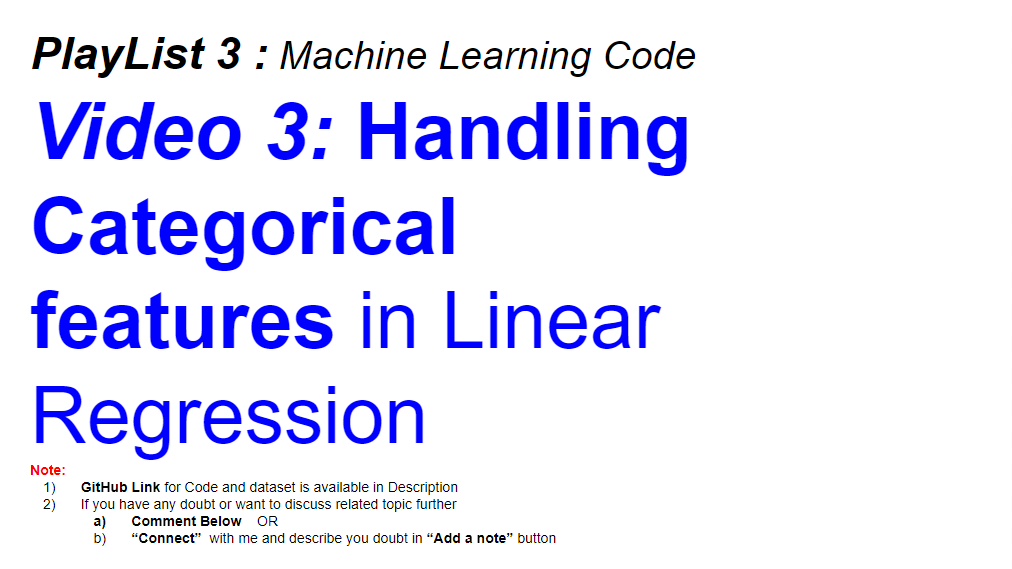

# Handling Categorical features with Two Categories
    # ML models cant understand categorical data
            # Because, they are just Mathematical equations
            # which need Numbers as i/p
            # & give o/p as Numbers only

### Any type of Model can NOT be trained with un-converted Categorical Data

In [14]:
data
# no Categorical Values in the orginial Data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [15]:
import numpy as np

# set a seed for reproductibility
np.random.seed(12345)

# create a series of booleans in which roughly half are true
nums = np.random.rand(len(data)) # random assignment
mask_large = nums > 0.5

# intially set Size to small, then change roughly half to Large
data['Scale'] = 'small'
data.loc[mask_large,'Scale'] = 'large'
data

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small
196,197,94.2,4.9,8.1,9.7,small
197,198,177.0,9.3,6.4,12.8,small
198,199,283.6,42.0,66.2,25.5,small


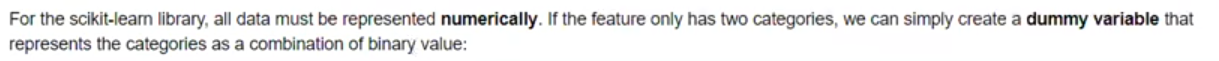

In [16]:
# create a new series called "CTGLtoNML" # Categorical to Numerical
data['CTGLtoNML'] = data.Scale.map({'small':0, 'large':1}) # MAPping function
data

,Unnamed: 0,TV,radio,newspaper,sales,Scale,CTGLtoNML
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0
196,197,94.2,4.9,8.1,9.7,small,0
197,198,177.0,9.3,6.4,12.8,small,0
198,199,283.6,42.0,66.2,25.5,small,0


In [17]:
# other methods to convert Categorical Data into Numerical Data
    # 1) One Hot Encoding
    # 2) TF IDF approach: Text Vectorization: Term Frequency — Inverse Document Frequency (TFIDF)
    # 3) Text Data Vectorization approach
    # 4) Numeration Approach

In [18]:
# To redo the Multiple Linear regression problems and
        # include 'CTGLtoNML' Predictor
    
# create X and Y
feature_cols = ['TV', 'radio', 'newspaper', 'CTGLtoNML']
X = data[feature_cols]
y = data.sales

In [19]:
# instantiate then fit
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [20]:
# print Co-efficients
i = 0
for col in feature_cols:
    print('The Coefficient of ', col, 'is: ',lm.coef_[i]) # [Coefficient = m1, m2, m3, m4] for x1, x2, x3, x4
    i = i+1

The Coefficient of  TV is:  0.045719820924362775
The Coefficient of  radio is:  0.1887281431342787
The Coefficient of  newspaper is:  -0.0010976794483516079
The Coefficient of  CTGLtoNML is:  0.0574238508548277


In [21]:
# How do we interpret the coefficient for "CTGLtoNML" 
	# for a given TV / Radio / Newspaper advertisement expenditure, 
	# if the average sales increases by 57.42 weights,
	# it is considered as a Large Market

# What if the 0/1 encoding is reversed?
	# Still, the value of the coefficient will be the same.
	# The only difference will be the sign.
	# It will be a Negative number instead of Positive

# Handling Categorical features with more than Two Categories
    # Let's create a new Column called "Target Geography"
    # and randomly assign observations to be "rural" , "suburban", or "urban"

In [22]:
# set a seed for reproductibility
np.random.seed(123456)

# assign roughly one third of obersvations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Target Geography'] = 'rural'
data.loc[mask_suburban, 'Target Geography'] = 'suburban'
data.loc[mask_urban, 'Target Geography'] = 'urban'
data

,Unnamed: 0,TV,radio,newspaper,sales,Scale,CTGLtoNML,Target Geography
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,urban
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,urban
4,5,180.8,10.8,58.4,12.9,large,1,suburban
...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0,suburban
196,197,94.2,4.9,8.1,9.7,small,0,urban
197,198,177.0,9.3,6.4,12.8,small,0,suburban
198,199,283.6,42.0,66.2,25.5,small,0,rural


In [23]:
# Again, we need to represent 'Target Geography' numericaally.
    # But, mapping 
                # urban = 0,
                # suburban = 1,
                # rural = 2
        # will mean that 'rural' is two times 'suburban',
                                # But, thats not true
    #Hence, we will create another dummy variable through 'One Hot Encoding'

In [24]:
# to create three dummy variables using "get_dummies" function,
    
area_dummies = pd.get_dummies(data['Target Geography'],
                              prefix='Target Geography')

area_dummies

,Target Geography_rural,Target Geography_suburban,Target Geography_urban
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
195,0,1,0
196,0,0,1
197,0,1,0
198,1,0,0


In [25]:
# to create three dummy variables using get_dummies,
            # then exclue the first dummy column
    
area_dummies = pd.get_dummies(data['Target Geography'], prefix='Target Geography').iloc[:,1:]

area_dummies

# but, 'One Hot Encoding' may create (1000-1 =) 999 columns for 1000 categories
    # "vectorization" approach solves this issue

,Target Geography_suburban,Target Geography_urban
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
195,1,0
196,0,1
197,1,0
198,0,0


In [26]:
# then concatenate the dummy variable columns onto the original Dataframe 
        #(axis=0 means rows, axis =1 means columns)
data1 = pd.concat([data, area_dummies], axis=1)
data1

,Unnamed: 0,TV,radio,newspaper,sales,Scale,CTGLtoNML,Target Geography,Target Geography_suburban,Target Geography_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,1,0
...,...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0,suburban,1,0
196,197,94.2,4.9,8.1,9.7,small,0,urban,0,1
197,198,177.0,9.3,6.4,12.8,small,0,suburban,1,0
198,199,283.6,42.0,66.2,25.5,small,0,rural,0,0


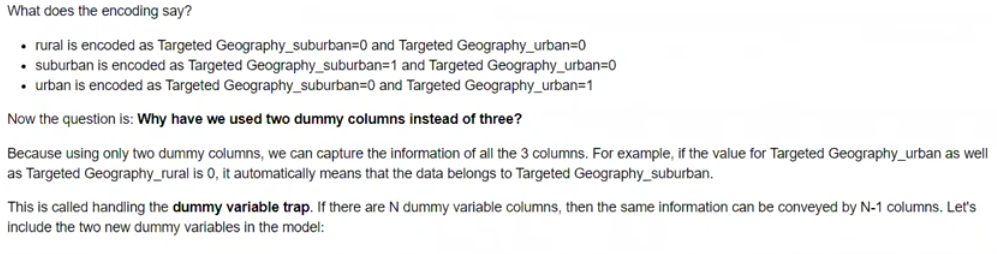

In [27]:
# create X and Y
feature_cols = ['TV', 'radio', 'newspaper', 'CTGLtoNML', 'Target Geography_suburban', 'Target Geography_urban']
X = data1[feature_cols]
y = data1.sales
print(X)
print(y)

        TV  radio  newspaper  CTGLtoNML  Target Geography_suburban  \
0    230.1   37.8       69.2          1                          0   
1     44.5   39.3       45.1          0                          0   
2     17.2   45.9       69.3          0                          0   
3    151.5   41.3       58.5          0                          0   
4    180.8   10.8       58.4          1                          1   
..     ...    ...        ...        ...                        ...   
195   38.2    3.7       13.8          0                          1   
196   94.2    4.9        8.1          0                          0   
197  177.0    9.3        6.4          0                          1   
198  283.6   42.0       66.2          0                          0   
199  232.1    8.6        8.7          1                          0   

     Target Geography_urban  
0                         0  
1                         1  
2                         0  
3                         1  
4        

In [28]:
# instantiate then fit
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [29]:
# print Co-efficients
print(feature_cols,lm.coef_)

['TV', 'radio', 'newspaper', 'CTGLtoNML', 'Target Geography_suburban', 'Target Geography_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [30]:
# 'Target Geography_suburban' = -0.10656299  # Advertisments have (-ve) effect in Sub-Urban area
# 'Target Geography_urban' = 0.26813802  # Advertisments have (+ve) effect in Sub-Urban area